In [1]:
# imports
import gymnasium as gym
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

c:\Coding\Python\University\reinforcement_learning\.venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


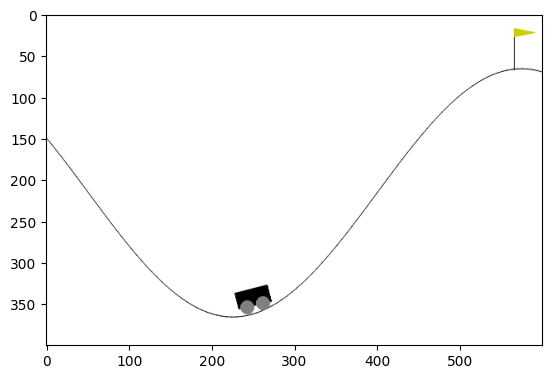

In [2]:
# create the MountainCar -environment
# we also disable max episode steps (default 200 steps), so we can experiment without interruptions
env = gym.make("MountainCar-v0", render_mode="rgb_array", max_episode_steps=-1)

# reset the environment and visualize first frame
env.reset()
plt.imshow(env.render())

### Make a simple agent WITHOUT reinforcement learning

The point of this part of the exercise is to experiment with a custom code that attempts to solve the environment without any RL algorithms. It's not probably feasible to actually solve this environment with a custom simple agent, but to experiment with the amount of variables and situations that have to be taken into account while landing the car on top of the mountain.

In [3]:
def simple_agent(observation):
    # get position and velocity
    position, velocity = observation
    
    # some data sanity checks (so that the agent doesn't crash)

    # first check, if velocity data happens to be an empty dictionary
    # => set it to default 0
    if isinstance(velocity, dict) and len(velocity) == 0:
        velocity = 0

    # seconc check: if position has multiple values, choose first one
    if isinstance(position, np.ndarray):
        position = position[0]

    #########################################
    ### THE SIMPLE AGENT CODE STARTS HERE ###
    #########################################

    # Choose what to do based on position and velocity
    # i.e. move right, move left or do nothing etc.

    # There are 3 actions in this environment
    # 0: Accelerate to the left (hold button)
    # 1: Don't accelerate (= do nothing)
    # 2: Accelerate to the right (hold button)

    # Tips: you need both velocity and position to control the car
    # for example, we should accelerate towards the direction the car is currently
    # going towards

    # => custom if-statements to make a decision for the car:
    # some ideas:
    # if car on left side and velocity is negative => accelerate left
    # if car on left side and velocity is positive => accelerate right
    # if car on right side and velocity is negative => accelerate left
    # if car on right side and velocity is positive => accelerate right

    # EXTRA CHALLENGE 1: try to park the car right on top of the flag pole
    # without sliding/crashing over the right side of the mountain

    # EXTRA CHALLENGE 2: don't allow the car bump into the left wall with full speed

    # EXAMPLE ON HOW TO APPROACH, a very rough way to solve it
    # in a nutshell => make if-statements for threshold values
    # and accelerate to the correct direction based on that

    # default action = do nothing
    action = 1

    # an estimated "sweet spot" for accelerating left, might be some value between 0.05 - 0.1
    if position > 0.059:
        return 0

    # probaly also have to stop braking the car after enough slowing down (extra challenge 1)

    # you can also define ranges in the if-statements
    # for specific instructions for the car

    # "a brute force" solution just accelerating to the current direction
    if velocity > 0.0 and position < 0.0:
        return 2
    
    # a rough middle point in the bottom of the pit is -0.5 or something close to that
    # => you can use the manual test version to verify this
    if velocity < 0.0 and position > -0.55:
        return 0
    
    return action

**Remember:** the environment starts the car at a random spot between -0.6 and -0.4 (this will affect the momentum slightly). you can lock down the random seed via env.reset(), for example: env.reset(seed=123). Naturally, it's easier to solve this environment manually if the initial position is always the same!

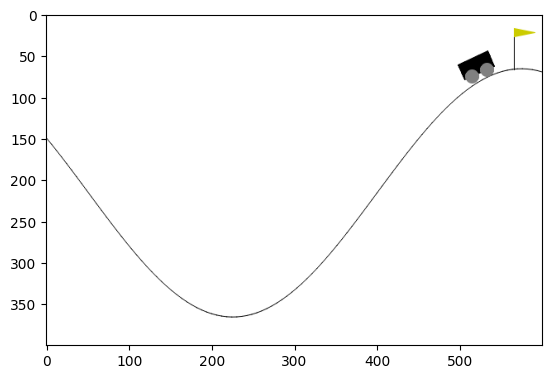

Position: 0.37404847145080566
Velocity: -0.022921865805983543


In [5]:
env.reset()
clear_output(wait=True)
plt.imshow(env.render())
plt.show()

# reset internal values in the environment
# you can also lock down the random seed by using seed-parameter
# i.e. env.reset(seed=123)
observation = env.reset()

# play the environment for 225 steps with our simple agent
for step in range(225):
    action = simple_agent(observation)

    # get the feedback / observations from the environment after taking the step
    observation, reward, done, info, truncate = env.step(action)

    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()

    print(f"Position: {observation[0]}")
    print(f"Velocity: {observation[1]}")

    # slow down the visual update
    time.sleep(0.001)

env.close()